# Mini Project Machine Learning 

# IPL Dataset from 2008-2019 

## We are trying to predict the the winner team from the available list of teams

Let us first load the Python libraries that are required for data exploration - Pandas (library for manipulating dataframes) and Seaborn and Matplotlib (libraries for visualization).

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Challenge

The Indian Premier League (IPL) is a professional Twenty20 cricket league in India hosted every year by eight teams representing eight different cities in India.The league was founded by the Board of Control for Cricket in India (BCCI) in 2008.

In this dataset,you will find information about every match such as playing teams,outcomes,toss information,umpire,scores as well as ball-by-ball data for every match played between 2008 to 4 May 2019.

Sports analytics has become a billion dollar industry since every team now wants to build a top class team for their next season.Hence,this type of data is quite useful for analyzing player as well as to predict future match outcomes.

## The Data

Let's start by reading the 'match_data.csv' file into a pandas dataframe called 'ipl'. We read this file using read_csv() function from pandas.

Here, sep argument will be used as separator or delimiter. If sep argument is not specified then default engine for parsing ( C Engine) will be used which uses ‘,’ as delimiter. So, while specifying the custom sep argument we must specify the engine argument as ‘python’, otherwise we will get the above warning.

In [59]:
ipl = pd.read_csv("match_data.csv", sep = ',', engine = 'python')

To get an overview of the dataset, we can get a snippet of the first few rows using the head() or last few rows using the tail(). The number within the parentheses represents the number of rows to be produced in the snippet, and has default value 5 for both head() and tail().

In [60]:
ipl.tail(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,winner,eliminator,...,overs,player_of_match,venue,umpire1,umpire2,umpire3,first_bat_team,first_bowl_team,first_bat_score,second_bat_score
741,1136567,2018,Hyderabad,2018-04-12,Sunrisers Hyderabad,Mumbai Indians,Sunrisers Hyderabad,field,Sunrisers Hyderabad,NaN,...,20,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,CK Nandan,NaN,Mumbai Indians,Sunrisers Hyderabad,147.0,151.0
742,392209,2009,East London,2009-05-04,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,Chennai Super Kings,NaN,...,20,MS Dhoni,Buffalo Park,BR Doctrove,M Erasmus,NaN,Chennai Super Kings,Deccan Chargers,178.0,100.0
743,336012,2008,Bangalore,2008-05-28,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,NaN,...,20,CRD Fernando,M Chinnaswamy Stadium,BF Bowden,AV Jayaprakash,NaN,Royal Challengers Bangalore,Mumbai Indians,122.0,126.0
744,729313,2014,NaN,2014-04-28,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,field,Kings XI Punjab,NaN,...,20,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN,Royal Challengers Bangalore,Kings XI Punjab,124.0,127.0
745,419157,2010,Bangalore,2010-04-17,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Mumbai Indians,NaN,...,20,R McLaren,M Chinnaswamy Stadium,HDPK Dharmasena,SJA Taufel,NaN,Mumbai Indians,Royal Challengers Bangalore,191.0,134.0


There are 12 columns and 891 rows in this dataset. We can get this dimension using 'shape' attribute of the pandas dataframe.

In [61]:
ipl.shape

(746, 24)

We can access the names of the features or columns of this dataframe using the 'columns' attribute.

In [62]:
# isna() finds the missing values and sum() combines the missing values and gives the output
ipl.isna().sum()

id                    0
season                0
city                 13
date                  0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner               12
eliminator          738
dl_applied          727
win_by_runs         410
win_by_wickets      348
result              734
overs                 0
player_of_match       4
venue                 0
umpire1               1
umpire2               1
umpire3             744
first_bat_team        0
first_bowl_team       0
first_bat_score       0
second_bat_score      2
dtype: int64

In [63]:
ipl.isnull().sum()/len(ipl)

id                  0.000000
season              0.000000
city                0.017426
date                0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
winner              0.016086
eliminator          0.989276
dl_applied          0.974531
win_by_runs         0.549598
win_by_wickets      0.466488
result              0.983914
overs               0.000000
player_of_match     0.005362
venue               0.000000
umpire1             0.001340
umpire2             0.001340
umpire3             0.997319
first_bat_team      0.000000
first_bowl_team     0.000000
first_bat_score     0.000000
second_bat_score    0.002681
dtype: float64

In [64]:
ipl.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'eliminator', 'dl_applied', 'win_by_runs',
       'win_by_wickets', 'result', 'overs', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3', 'first_bat_team', 'first_bowl_team',
       'first_bat_score', 'second_bat_score'],
      dtype='object')

To understand the data types in each of these columns, we use info(). It also gives us information about number of missing values (Null or NaN) for each column. 

In [65]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                746 non-null    int64  
 1   season            746 non-null    int64  
 2   city              733 non-null    object 
 3   date              746 non-null    object 
 4   team1             746 non-null    object 
 5   team2             746 non-null    object 
 6   toss_winner       746 non-null    object 
 7   toss_decision     746 non-null    object 
 8   winner            734 non-null    object 
 9   eliminator        8 non-null      object 
 10  dl_applied        19 non-null     object 
 11  win_by_runs       336 non-null    float64
 12  win_by_wickets    398 non-null    float64
 13  result            12 non-null     object 
 14  overs             746 non-null    int64  
 15  player_of_match   742 non-null    object 
 16  venue             746 non-null    object 
 1

'int64' corresponds to integer values, 'float64' corresponds to real numbers, 'object' corresponds to strings, data-time or any other structured data types.

To get an idea about the distribution of each of these features in the dataset, let us look at their 5-number summary - min, 1st quartile, median (2nd quartile), 3rd quartile, max.

Significant difference between mean and median values suggests presence of outliers in the data.

In [66]:
ipl.describe()

,id,season,win_by_runs,win_by_wickets,overs,first_bat_score,second_bat_score
count,7.460000e+02,746.000000,336.000000,398.000000,746.0,746.000000,744.000000
mean,7.135520e+05,2013.369973,29.883929,6.251256,20.0,161.356568,147.841398
std,2.845419e+05,3.326906,27.276827,1.821281,0.0,30.537844,31.153406
min,3.359820e+05,2008.000000,1.000000,1.000000,20.0,56.000000,2.000000
25%,5.012092e+05,2011.000000,11.000000,5.000000,20.0,142.000000,131.000000
50%,5.980485e+05,2013.000000,22.000000,6.000000,20.0,163.000000,150.000000
75%,9.809845e+05,2016.000000,39.000000,8.000000,20.0,182.000000,169.000000
max,1.178425e+06,2019.000000,146.000000,10.000000,20.0,263.000000,223.000000


### Finding missing values

Let us first figure out the number of missing values in each of these columns by using isnull() and counting them.

In [67]:
ipl.isnull().sum()

id                    0
season                0
city                 13
date                  0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner               12
eliminator          738
dl_applied          727
win_by_runs         410
win_by_wickets      348
result              734
overs                 0
player_of_match       4
venue                 0
umpire1               1
umpire2               1
umpire3             744
first_bat_team        0
first_bowl_team       0
first_bat_score       0
second_bat_score      2
dtype: int64

In [68]:
ipl.nunique()

id                  746
season               12
city                 30
date                538
team1                15
team2                15
toss_winner          15
toss_decision         2
winner               15
eliminator            6
dl_applied            1
win_by_runs          88
win_by_wickets       10
result                2
overs                 1
player_of_match     223
venue                36
umpire1              49
umpire2              48
umpire3               2
first_bat_team       15
first_bowl_team      15
first_bat_score     148
second_bat_score    143
dtype: int64

 ### The target column here we are choosing is winner and the problem we're trying to predict is which team wins 

In [69]:
ipl.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'eliminator', 'dl_applied', 'win_by_runs',
       'win_by_wickets', 'result', 'overs', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3', 'first_bat_team', 'first_bowl_team',
       'first_bat_score', 'second_bat_score'],
      dtype='object')

In [70]:
ipl['toss_winner'].value_counts()

Mumbai Indians                 95
Kolkata Knight Riders          91
Chennai Super Kings            87
Royal Challengers Bangalore    80
Delhi Daredevils               80
Kings XI Punjab                80
Rajasthan Royals               79
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                  9
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [71]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,winner,eliminator,...,overs,player_of_match,venue,umpire1,umpire2,umpire3,first_bat_team,first_bowl_team,first_bat_score,second_bat_score
0,419164,2010,Mumbai,2010-04-24,Royal Challengers Bangalore,Deccan Chargers,Deccan Chargers,bat,Royal Challengers Bangalore,NaN,...,20,A Kumble,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN,Deccan Chargers,Royal Challengers Bangalore,82.0,86.0
1,419131,2010,Delhi,2010-03-29,Delhi Daredevils,Kolkata Knight Riders,Delhi Daredevils,bat,Delhi Daredevils,NaN,...,20,DA Warner,Feroz Shah Kotla,SS Hazare,SJA Taufel,NaN,Delhi Daredevils,Kolkata Knight Riders,177.0,137.0
2,336021,2008,Mumbai,2008-05-16,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,Mumbai Indians,NaN,...,20,SM Pollock,Wankhede Stadium,BR Doctrove,DJ Harper,NaN,Kolkata Knight Riders,Mumbai Indians,67.0,68.0
3,980931,2016,Pune,2016-04-22,Rising Pune Supergiants,Royal Challengers Bangalore,Rising Pune Supergiants,field,Royal Challengers Bangalore,NaN,...,20,AB de Villiers,Maharashtra Cricket Association Stadium,CB Gaffaney,VK Sharma,NaN,Royal Challengers Bangalore,Rising Pune Supergiants,185.0,172.0
4,419163,2010,Mumbai,2010-04-22,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,Chennai Super Kings,NaN,...,20,DE Bollinger,Dr DY Patil Sports Academy,BR Doctrove,RB Tiffin,NaN,Chennai Super Kings,Deccan Chargers,142.0,104.0


## Univariate Analysis

### Visualizing numeric attributes/features

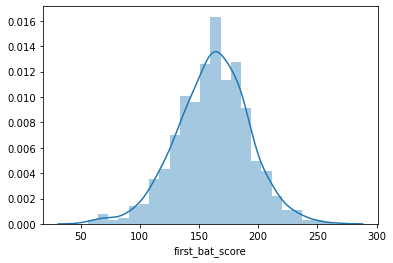

In [72]:
sns.distplot(ipl['first_bat_score'])

The sns here represents the seaborn library used for visualizing the data. 
Here, we are plotting a Histogram using the distplot function for the Column "first_bat_score". 
It shows the distribution of the first bating score of all the players from each team.
The x-axis represents the Range of values in first_bat_score and y-axis shows the probable density of the values. 
This fare column deals with numeric data and The mode is close to zero.
We also observe that the highest bating score is around 160 - 170 and lowest is 150 - 140 runs.

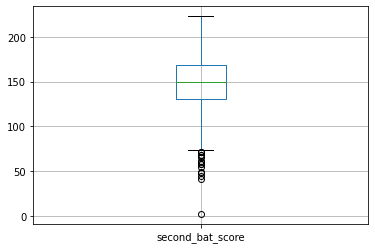

In [73]:
ipl.boxplot(column = 'second_bat_score')

Here, we have plotted a boxplot for the column second_bat_score. This is the pandas inbuilt function for a boxplot.
In the plot, looking from below, first we can see the whisker, which depicts the Minimum value. 

Then the line of the box which depicts the Q1 - First Quartile, the median which is the line inside the box, the top line of the box which gives us the value of Q3 - Third quartile and the whisker outside the box on the top, which gives us the maximum value. Here, we can also see that there are a lot of outliers.

Which means that the scores of the players of particular team depicted as outliers was very much higher than most of the other teams. That is most of the players got out with low runs.

Also the highest score of the second_bat_score is around 150 to 170 and lowest is 150 to 130 runs.

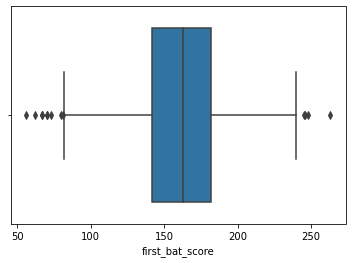

In [74]:
sns.boxplot('first_bat_score', data = ipl)

Here, we are plotting a boxplot for the column first_bat_score.
Seaborn library is used so that we get a more clear picture of the data. 

The boxplots are generally used to plot for single column. 
In the above plot, we can see that there is a lot of variation in the data and there are a lot of outliers,
which means that most of the players scores were not good but overall target of the runs was good to the opponent team.
As mentioned above for the histogram plot the highest bating score is around 160 - 170 and lowest is 150 - 140 runs.

The whole plot gives us the summary of the first_bat_score column. 

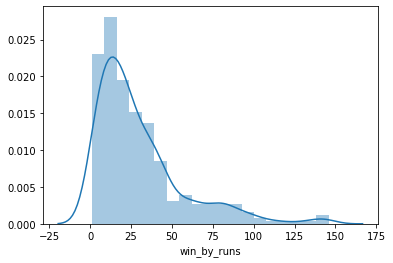

In [75]:
sns.distplot(ipl['win_by_runs'])

This is a plot of a Histogram using displot function for the win_by-runs column using seaborn library.
The curve in the above plot represents the kernel density estimation based on the histogram.

This column deals with numeric data. From the plot we can conclude that the rate at which the win by runs is higher is 10-15.

Also, we see that the first batting team has won the match more number of times comparing to the second batting team by making all out to the opponent team.

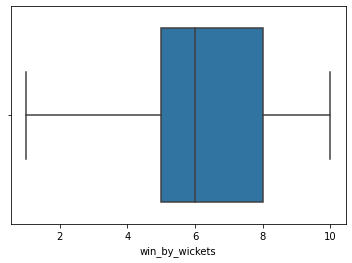

In [76]:
sns.boxplot(x = 'win_by_wickets', data =ipl)

Here, we have plotted a boxplot for the column win_by_wickets. This is the pandas inbuilt function for a boxplot.

In the plot, looking from below, first we can see the whisker, which depicts the Minimum value. 
Then the line of the box which depicts the Q1 - First Quartile, the median  which is the line inside the box, the top line of the box which gives us the value of Q3 - Third quartile and the whisker outside the box on the top, which gives us the maximum value. 


Visualizing the numeric value from the ipl dataset.

In this boxplot ,we are going to visualize the numeric value column called "win_by_wickets" to understand the distribution of quantitative data in a way to facilitate comparisons between the variables or across the categorical variables. This ia single horizontal boxplot. 

When we observe, that the second team wins by beating the target of the  opponent team, also in the graph we see that the teams has mostly won by wickets in 50 to 80%.

### Visualizing categorical attributes/features

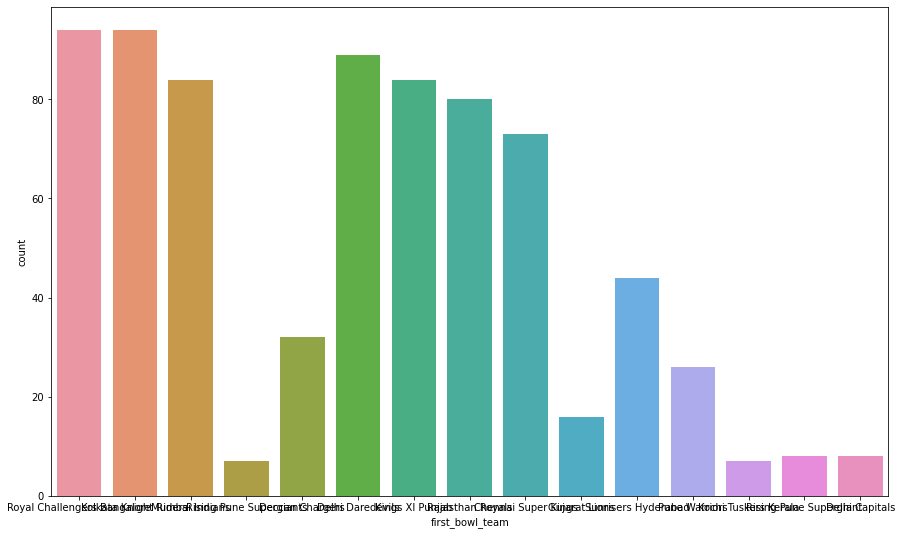

In [77]:
plt.figure(figsize=(15, 9))
sns.countplot(ipl['first_bowl_team'])

sns.countplot() method is used to show the counts of observations in each categorical bin using bars.

This plot will show the first_bowl_team in the match. This is ordinal data. 
As per the IPL dataset, Royal challengers bangalore and Kolkata Knight Riders are the teams with highest ratio of 80% to bowl well as the first teams in the match.

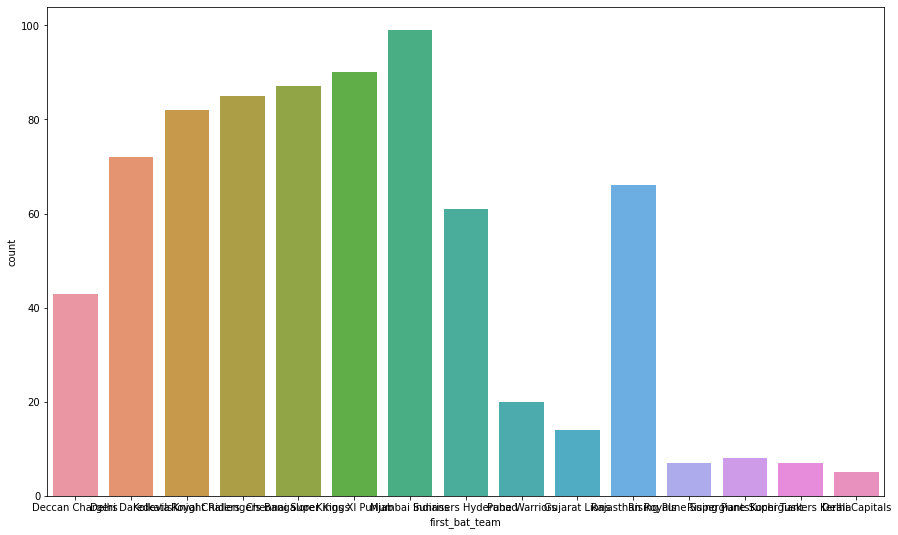

In [78]:
plt.figure(figsize=(15, 9))
sns.countplot(ipl['first_bat_team'])

This is a categorical variable. When we see this countplot, the highest is more of batsman. 

This plot will show the first_bat_team in the match. This is ordinal data. 

As per the IPL dataset, Mumbai Indians and Kings XI Punjab are the teams with highest ratio of 95% to bat well as the first teams in the match.

The x axis represents the first_bat_team and the in the y axis represents count.

Most of the teams batted above average but we can predict that the match was with good score and was interesting match to to audience.

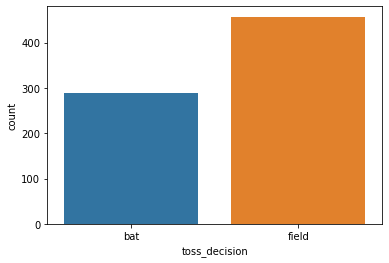

In [79]:
sns.countplot(ipl['toss_decision'])

Here, we can see that toss decision with fielding was the most teams choosen around 450 times, and batting was around 390 times 

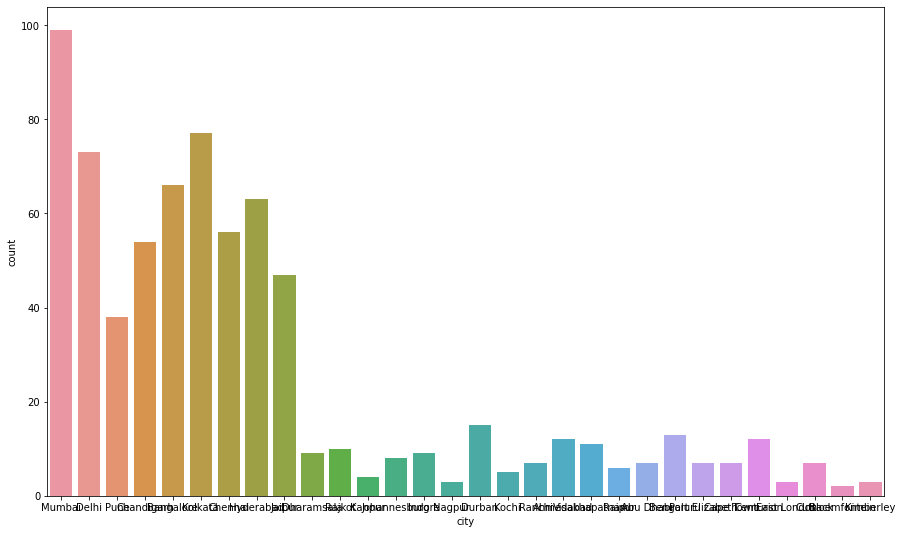

In [80]:
plt.figure(figsize=(15, 9))
sns.countplot(ipl['city']) 

We use seaborn library here for visualization. 

We are using countplot to plotting a graphical plot for column ”city” that shows the occurrences or frequency for each categorical data using bar. It shows the total cities in the list which has the highest number of match played is Mumbai, Delhi, Punjab, Chandhigarh, Bangalore, Kolkata, Chennai, Hyderabad and other city with lowest count of matches.

The x-axis shows then number of cities in the list and y-axis shows the Count of the total matches played.

To determine the frequency table for a column, we use value_counts(). This frequency table is used for making a countplot or a distplot.

## Bivariate Data Analysis

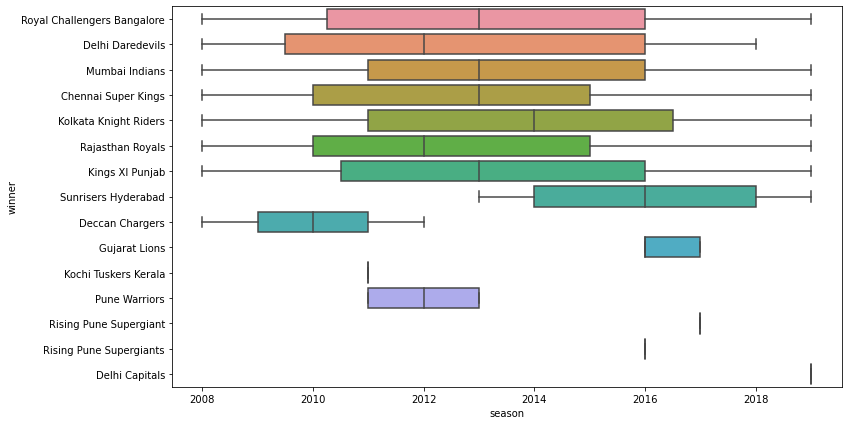

In [81]:
plt.figure(figsize=(12, 7))
g = sns.boxplot(x = 'season', y = 'winner', data = ipl)


You can play around with ylim values to look at the boxplot for fare comparison between the different classes.

Using seaborn library to plot a boxplot here to present the data graph .

Here,we on x-axis the year of season and along y-axis with winners of the match. According to the graph the we see that there are not much outliers and the winners list has Delhi Daredevils, sunrisers Hyderabad, Kolkata Knight Riders, Royal Challengers Bagalore, Mumbai Inadians, Chennai Super Kings

Where Delhi Daredevils has the won the most of the sesons.

[(175.0, 0.0)]

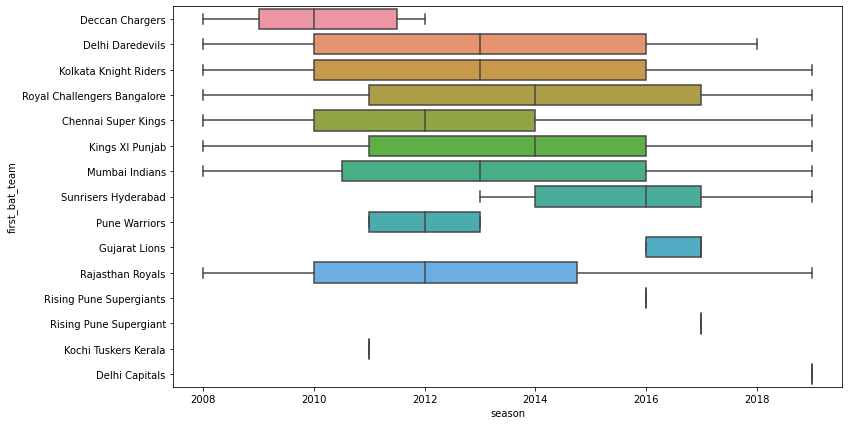

In [82]:
plt.figure(figsize=(12, 7))
sns.boxplot(x = 'season', y = 'first_bat_team', data = ipl)
g.set(xlim = (175, 0))

 x-axis the year of season and along y-axis with First batting team of the match
 
 Delhi Daredevils and the Kolkata Knight Riders has performed well in first batting from 2010 to 2016 seasons

#### Visualizing relationship between 2 categorical variables

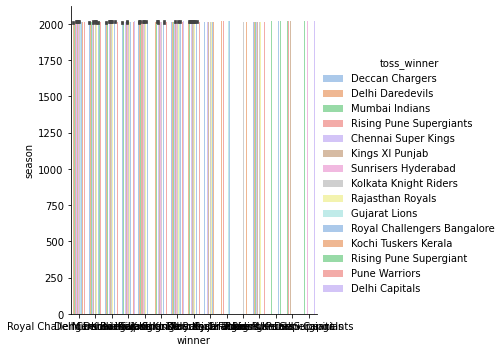

In [83]:
sns.catplot(x='winner', y='season', hue='toss_winner', kind='bar', data=ipl, palette = 'pastel')

This is a Categorical plot, using Seaborn library. Here, along x-axis, winner teams is shown and along y-axis we can see the season column and the coloring of the bars depict who won the match most of the times. Eventhough  is a categorical variable having 0 or 1, the catplot considers it as numerical. 

Through this plot we can observe that the Delhi Daredevils has won most of the times.

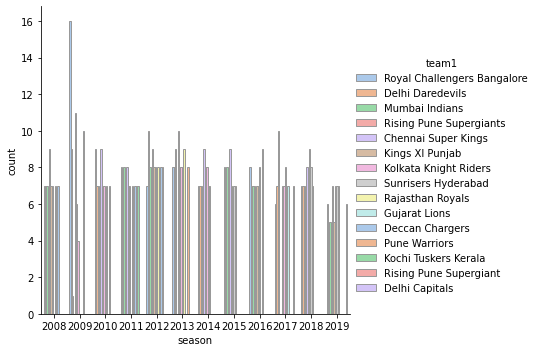

In [84]:
sns.catplot(x="season", hue="team1", kind="count", palette="pastel", edgecolor=".6", data=ipl)

Here, in this categorical plot we have used seaborn again. 

And we are looking at the count of the the teams won in each season. 

Royal Challengers Bangalore has the count highest in the 2009 season.

#### Visualizing relationship between a numeric and a categorical variable

Let us check out the distribution of winner teams of Royal Challengers Bangalore and Delhi Capitals with first batting scores

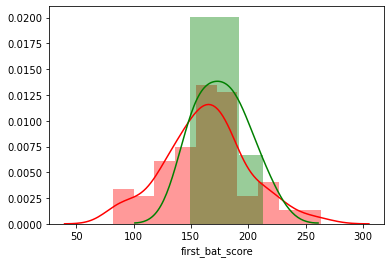

In [85]:
sns.distplot(ipl[ipl['winner'] == 'Royal Challengers Bangalore']['first_bat_score'], color = 'red')
sns.distplot(ipl[ipl['winner'] == 'Delhi Capitals']['first_bat_score'], color = 'green')

Winner distribution of Royal Challengers Bangalore and Delhi Capitals among the passengers.

Plotting the histogram of Royal Challengers Bangalore and Delhi Capitals innings in one graph itself. Red curve shows Royal Challengers Bangalore over, green curve shows Delhi Capitals over. We see that first batting score of Royal Challengers Bangalore with highest score was from 150 to 180 and  Delhi Capitals with highest score was from 150 to 210 

E:\Anaconda\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


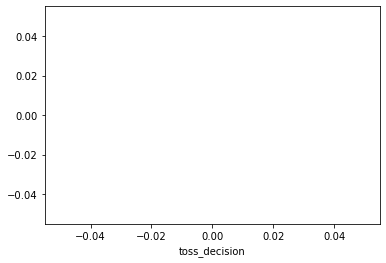

In [86]:
sns.distplot(ipl[ipl['season'] == 0]['toss_decision'], color = 'red')
sns.distplot(ipl[ipl['season'] == 1]['toss_decision'], color = 'blue')

And let us find out the chances of most number of matches which team has most batting and fielding decisions. 

Histogram plot shows that batsman score is higher in the bowled over at 1st to 2nd over and slowly it decreases.
Where as the bowling over is >50% which very good performance of the batting team.

#### Visualizing relationship between 2 numeric variables

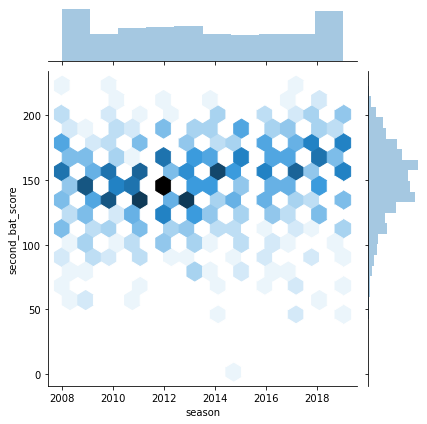

In [87]:
sns.jointplot(x = 'season', y = 'second_bat_score', data = ipl, kind = 'hex') #, ylim = (0,250))

Bivariate analysis between two variables. It is a ajoint plot as almost like scatter plot.

In the xplot the intensity of the color tells that more number of second teams batsmans scored very good above 100 that is the dark plots in the graph, the slit light color changes based on the score is the lowest scores in the team. X -axis shows the season. Y-axis shows the second_bat_score.

#### Visualizing relationship between all pairs of variables simultaneously

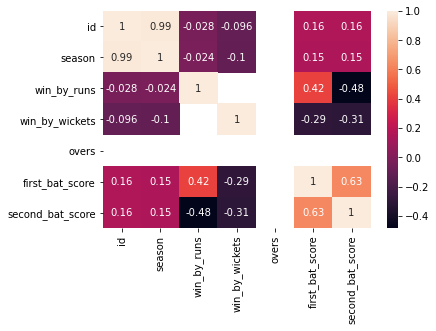

In [88]:
sns.heatmap(ipl.corr(), annot = True)

Bivariate plot is plotting the co-relation. 

Here it is co-relating with each of the features. It gives different shades based on the value. You can view it with value by givin annot=true. We observe that the win by runs has accuracy is 100%.

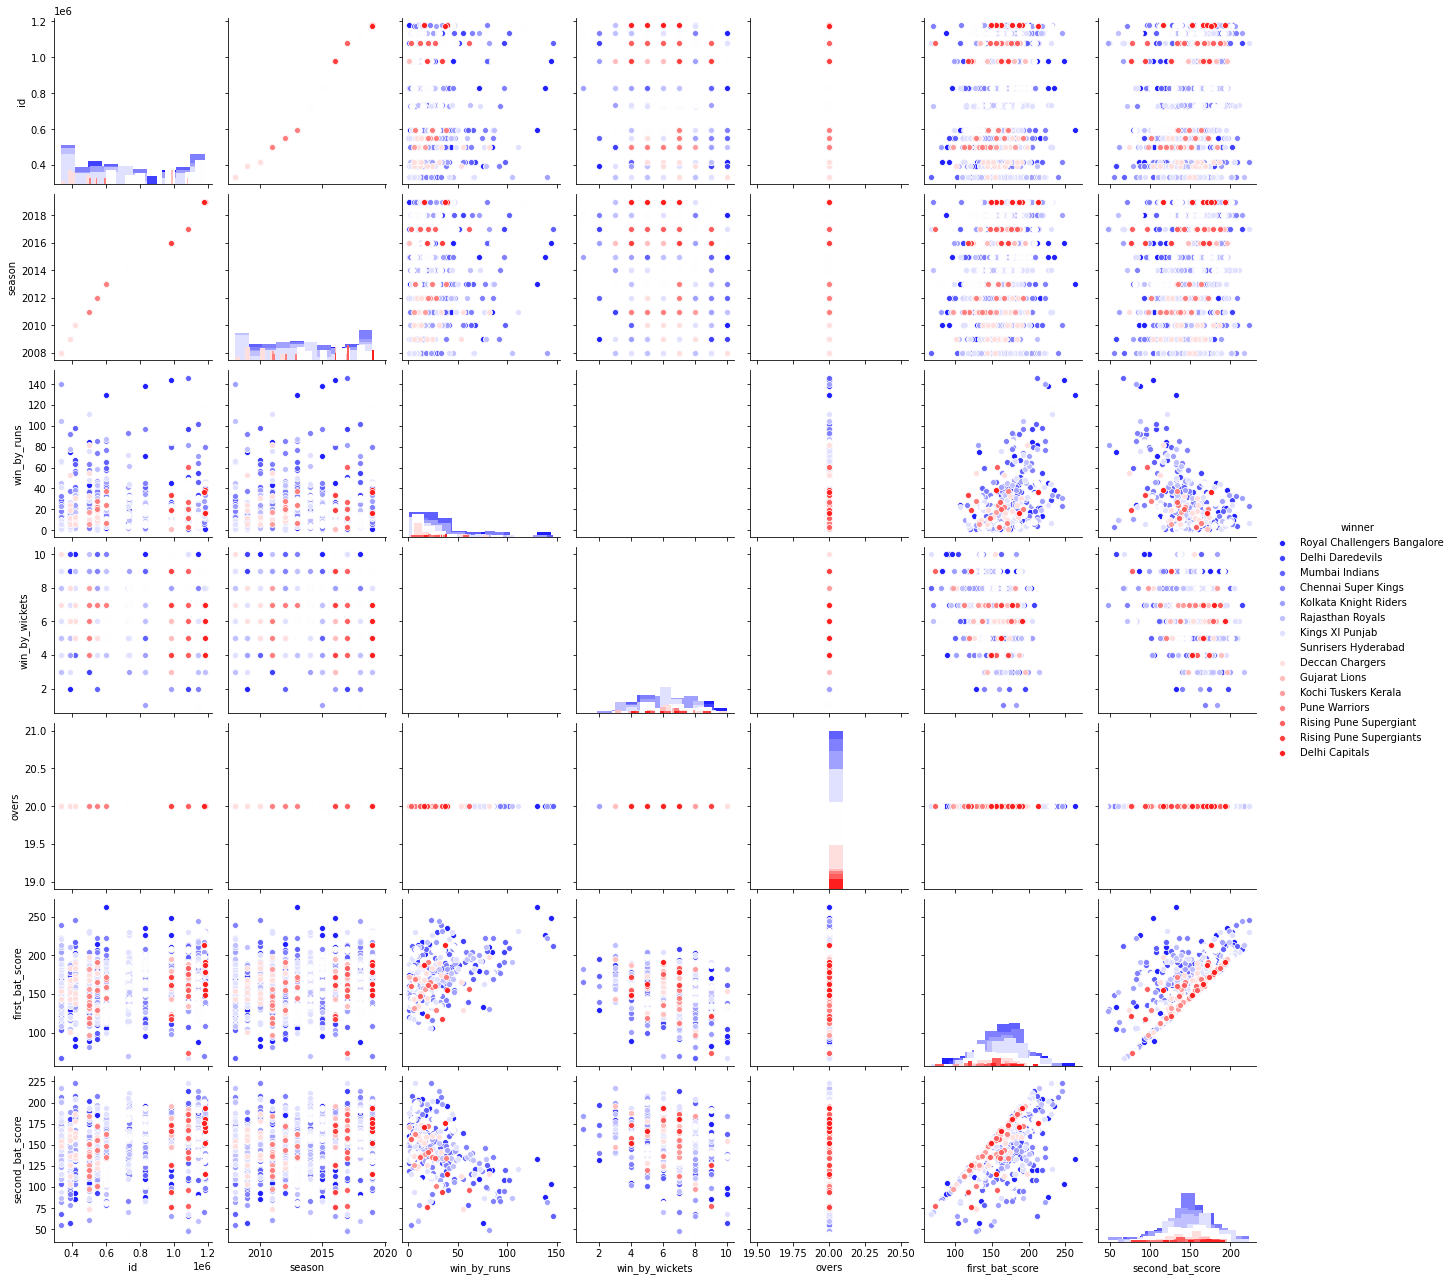

In [89]:
sns.pairplot(ipl, diag_kind = 'hist', hue = 'winner', palette = 'bwr')

Pair plot it take all the features. Numeric columns is considered.

It plots only numeric column.  It cannot plot scatter plot since both the axis are not same.
All the dialogonal elements are histogram. 
Through the graph we can predict that the Royal Challengers Bangalore and Delhi Daredevils has played very well comparing all the season and circumstances.
Also we can observe that the season to season the new comer player is breaking the records of the previous batsmans with very good run score rating.
Various prediction can be made through pair plot and it is viewed beautifully.

# Story on IPL Dataset from 2008-2019

# Description:

The Indian Premier League (IPL) is a professional Twenty20 cricket league in India hosted every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India (BCCI) in 2008.
In this dataset, you will find information about every match such as playing teams, outcomes, toss information, umpire, scores as well as ball-by-ball data for every match played between 2008 to 4 May 2019.
Sports analytics has become a billion dollar industry since every team now wants to build a top class team for their next season. Hence, this type of data is quite useful for analyzing player as well as to predict future match outcomes.

The reason for the IPL dataset is we are able to view the players statistical data with there strike rate, Run Scores, Highest sixes, also can track the score board record of all the players. It makes such a easier task to view the huge amount of data in simple way.


# Observation made are:

We observe that the initially we had lots of missing values and repeated values, which will make us to delete it and make the further predictions in data pre-processing step.

This dataset helps us to predict the which team wins from the season 2008 to 2019 by collecting the required information in all possibilities.

Total runs of all the players from each team is predicted.

In this boxplot ,we are going to visualize the numeric value column called "season" to understand the distribution of quantitative data in a way to facilitate comparisons between the variables or across the categorical variables. This ia single horizontal boxplot. 

When we observe, the Royal Challengers Bangalore and the Delhi Daredevils has played well in most of the seasons.


# Relationship:


Plotting a Histogram using the distplot function for the Column "first_bat_score". 
It shows the distribution of the first bating score of all the players from each team.This fare column deals with numeric data and The mode is close to zero.
We also observe that the highest bating score is around 160 - 170 and lowest is 150 - 140 runs.

The boxplots are generally used to plot for single column. In the above plot, we can see that there is a lot of variation in the data and there are a lot of outliers, which means that most of the players scores were not good but overall target of the runs was good to the opponent team. As mentioned above for the histogram plot the highest bating score is around 160 - 170 and lowest is 150 - 140 runs.
The whole plot gives us the summary of the first_bat_score column.

Histogram using displot function for the win_by-runs column using seaborn library. The curve in the above plot represents the kernel density estimation based on the histogram.
This column deals with numeric data. From the plot we can conclude that the rate at which the win by runs is higher is 10-15.
Also, we see that the first batting team has won the match more number of times comparing to the second batting team by making all out to the opponent team.

ns.countplot() method is used to show the counts of observations in each categorical bin using bars.
This plot will show the first_bowl_team in the match. This is ordinal data. As per the IPL dataset, Royal challengers bangalore and Kolkata Knight Riders are the teams with highest ratio of 80% to bowl well as the first teams in the match.

We are using countplot to plotting a graphical plot for column ”city” that shows the occurrences or frequency for each categorical data using bar. It shows the total cities in the list which has the highest number of match played is Mumbai, Delhi, Punjab, Chandhigarh, Bangalore, Kolkata, Chennai, Hyderabad and other city with lowest count of matches.
You can play around with ylim values to look at the boxplot for fare comparison between the different classes.

Categorical plot, using Seaborn library. Here, along x-axis, winner teams is shown and along y-axis we can see the season column and the coloring of the bars depict who won the match most of the times. Eventhough is a categorical variable having 0 or 1, the catplot considers it as numerical.
Royal Challengers Bangalore has the count highest in the 2009 season.

Plotting the histogram of Royal Challengers Bangalore and Delhi Capitals innings in one graph itself. Red curve shows Royal Challengers Bangalore over, green curve shows Delhi Capitals over. We see that first batting score of Royal Challengers Bangalore with highest score was from 150 to 180 and Delhi Capitals with highest score was from 150 to 210

Histogram plot shows that batsman score is higher in the bowled over at 1st to 2nd over and slowly it decreases. Where as the bowling over is >50% which very good performance of the batting team


# Summary:

The IPL Dataset is the interesting dataset for the cricket lovers , useful for analyzing winner of the match as well as to predict future winning match outcomes.

 By this dataset  we can predict  the future data. The predicted data might not be 100% correct but it is also not a wrong prediction. 
Overall we predict the performance of the players and see who is the best players and also a allrounder.
We see that the players day by day improve there performance and give there best. By the graph we see the same that each season to season the players are getting better and better in each team. So it is always the competition to all the respected teams to get first in the winners list.

This Dataset is very much helpful  in the real world and it is already making the difference also fan followers are higher and higher for this IPL season matches.


# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ipl = pd.read_csv("match_data.csv", sep = ',', engine = 'python')

In [3]:
ipl.shape

(746, 24)


### Finding missing values

Let us first figure out the number of missing values in each of these columns by using isnull() and counting them.

 The target column here we are choosing is winner and the problem we're trying to predict is which team wins 

In [4]:
ipl.isna().sum()

id                    0
season                0
city                 13
date                  0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner               12
eliminator          738
dl_applied          727
win_by_runs         410
win_by_wickets      348
result              734
overs                 0
player_of_match       4
venue                 0
umpire1               1
umpire2               1
umpire3             744
first_bat_team        0
first_bowl_team       0
first_bat_score       0
second_bat_score      2
dtype: int64

In [5]:
ipl.isna()

,id,season,city,date,team1,team2,toss_winner,toss_decision,winner,eliminator,...,overs,player_of_match,venue,umpire1,umpire2,umpire3,first_bat_team,first_bowl_team,first_bat_score,second_bat_score
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
742,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
743,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
744,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


### Dimensionality Reduction

We see that the 'id','eliminator','dl_applied','result','overs','player_of_match','venue','umpire1','umpire2','umpire3' doesnot effect the target column 'winner'. 

So we drop these columns and store the dataframe with reduced number of features in a new dataframe called 'ipl'.

Since the Eliminator,Result,umpire1,umpire2,umpire3 and dl_applied doesn't play any role in the winning of the teams, we are deleting those above columns from the ipl dataset 

In [6]:
ipl_cp= ipl

In [7]:
#Deleting the columns for more than 80% missing values
ipl.drop(['id','eliminator','dl_applied','result','overs','player_of_match','venue','umpire1','umpire2','umpire3'],axis=1,inplace=True)

In [8]:
ipl.columns

Index(['season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'win_by_runs', 'win_by_wickets',
       'first_bat_team', 'first_bowl_team', 'first_bat_score',
       'second_bat_score'],
      dtype='object')

In [9]:
ipl['toss_winner'].value_counts()

Mumbai Indians                 95
Kolkata Knight Riders          91
Chennai Super Kings            87
Delhi Daredevils               80
Royal Challengers Bangalore    80
Kings XI Punjab                80
Rajasthan Royals               79
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                  9
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [10]:
ipl.head()

,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,first_bat_team,first_bowl_team,first_bat_score,second_bat_score
0,2010,Mumbai,2010-04-24,Royal Challengers Bangalore,Deccan Chargers,Deccan Chargers,bat,Royal Challengers Bangalore,NaN,9.0,Deccan Chargers,Royal Challengers Bangalore,82.0,86.0
1,2010,Delhi,2010-03-29,Delhi Daredevils,Kolkata Knight Riders,Delhi Daredevils,bat,Delhi Daredevils,40.0,NaN,Delhi Daredevils,Kolkata Knight Riders,177.0,137.0
2,2008,Mumbai,2008-05-16,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,Mumbai Indians,NaN,8.0,Kolkata Knight Riders,Mumbai Indians,67.0,68.0
3,2016,Pune,2016-04-22,Rising Pune Supergiants,Royal Challengers Bangalore,Rising Pune Supergiants,field,Royal Challengers Bangalore,13.0,NaN,Royal Challengers Bangalore,Rising Pune Supergiants,185.0,172.0
4,2010,Mumbai,2010-04-22,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,Chennai Super Kings,38.0,NaN,Chennai Super Kings,Deccan Chargers,142.0,104.0


Even though the toss winner is the categorical column with any of the possible 14 teams but it can take only 2 possible values for the given match, either team 1 or team 2 for that match. So we'll convert this to numeric column where, toss winner =1, if team1 wins the toss and toss winner =2 otherwise

In [11]:
for i in  range(ipl.shape[0]):
    if ipl['toss_winner'].iloc[i]==ipl['team1'].iloc[i]:
        ipl['toss_winner'].iloc[i]=0
    elif ipl['toss_winner'].iloc[i]==ipl['team2'].iloc[i]:
        ipl['toss_winner'].iloc[i]=1

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
ipl['toss_winner'].value_counts()

1    387
0    359
Name: toss_winner, dtype: int64

In [13]:
ipl.drop(['first_bat_team','first_bowl_team'],axis=1,inplace=True)

In [14]:
ipl['winner'].value_counts()

Mumbai Indians                 104
Chennai Super Kings             99
Kolkata Knight Riders           91
Royal Challengers Bangalore     82
Kings XI Punjab                 79
Rajasthan Royals                73
Delhi Daredevils                67
Sunrisers Hyderabad             57
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                   7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [15]:
for i in  range(ipl.shape[0]):
    if ipl['winner'].iloc[i]==ipl['team1'].iloc[i]:
        ipl['winner'].iloc[i]=0
    elif ipl['winner'].iloc[i]==ipl['team2'].iloc[i]:
        ipl['winner'].iloc[i]=1

In [16]:
ipl['winner'].value_counts()

0    403
1    331
Name: winner, dtype: int64

In [17]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            746 non-null    int64  
 1   city              733 non-null    object 
 2   date              746 non-null    object 
 3   team1             746 non-null    object 
 4   team2             746 non-null    object 
 5   toss_winner       746 non-null    object 
 6   toss_decision     746 non-null    object 
 7   winner            734 non-null    object 
 8   win_by_runs       336 non-null    float64
 9   win_by_wickets    398 non-null    float64
 10  first_bat_score   746 non-null    float64
 11  second_bat_score  744 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 70.1+ KB


Here we are interested in predicting in winner team particular match That why we have reduced the toss winner and winner column to 
binary variables. If the goal was to predict the winner of the season,then we'll have to take all teams into account
while converting toss_winner and winner into numeric form

In [18]:
ipl_copy2=ipl

In [19]:
drop_list=[]
for i in  range(ipl.shape[0]):
    if np.isnan(ipl['win_by_runs'].iloc[i]) and np.isnan(ipl['win_by_wickets'].iloc[i]):
        #ipl_copy2.drop(i,inplace=True)
        drop_list.append(i)
        print(i)

97
111
139
177
218
239
244
335
489
617
690
717


In [20]:
ipl_copy2.drop(ipl_copy2.index[drop_list],inplace=True)

In [21]:
ipl.drop(ipl.index[drop_list],inplace=True)

In [22]:
# Checking if win by row is missing with win by wickets
for i in  range(ipl.shape[0]):
    if np.isnan(ipl['win_by_runs'].iloc[i]):
        ipl['win_by_runs'].iloc[i]=0
    if np.isnan(ipl['win_by_wickets'].iloc[i]):
        ipl['win_by_wickets'].iloc[i]=0
        

In [23]:
ipl.isna().sum()

season               0
city                13
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               0
win_by_runs          0
win_by_wickets       0
first_bat_score      0
second_bat_score     0
dtype: int64

We have dropped the rows where both winbyruns and winbywickets hve missing values. If only 1 of them is missing,we impuite it with zero. Now only city column has missing values and the proportion of missingness is 13 out of 746 which is very low. So we dropping the rows where city column has missing values.

In [24]:
ipl.dropna(inplace=True)

Let us understand the relationship between 'toss_winner' and 'toss_winner' columns and the effect they have on survival of a passenger.

In [25]:
ipl[['toss_winner', 'toss_decision']].nunique()

toss_winner      2
toss_decision    2
dtype: int64

In [26]:
ipl['toss_winner'].value_counts()

1    372
0    337
Name: toss_winner, dtype: int64

In [27]:
ipl['toss_decision'].value_counts()

field    435
bat      274
Name: toss_decision, dtype: int64

In [28]:
ipl.head()

,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,first_bat_score,second_bat_score
0,2010,Mumbai,2010-04-24,Royal Challengers Bangalore,Deccan Chargers,1,bat,0,0.0,9.0,82.0,86.0
1,2010,Delhi,2010-03-29,Delhi Daredevils,Kolkata Knight Riders,0,bat,0,40.0,0.0,177.0,137.0
2,2008,Mumbai,2008-05-16,Mumbai Indians,Kolkata Knight Riders,0,field,0,0.0,8.0,67.0,68.0
3,2016,Pune,2016-04-22,Rising Pune Supergiants,Royal Challengers Bangalore,0,field,1,13.0,0.0,185.0,172.0
4,2010,Mumbai,2010-04-22,Chennai Super Kings,Deccan Chargers,0,bat,0,38.0,0.0,142.0,104.0


In [29]:
ipl['team1'].value_counts()

Royal Challengers Bangalore    88
Chennai Super Kings            86
Mumbai Indians                 82
Kings XI Punjab                82
Kolkata Knight Riders          80
Delhi Daredevils               79
Rajasthan Royals               63
Sunrisers Hyderabad            49
Deccan Chargers                38
Pune Warriors                  22
Gujarat Lions                  14
Rising Pune Supergiants         7
Kochi Tuskers Kerala            7
Rising Pune Supergiant          7
Delhi Capitals                  5
Name: team1, dtype: int64

In [30]:
ipl['team2'].value_counts()

Mumbai Indians                 94
Kolkata Knight Riders          86
Kings XI Punjab                85
Royal Challengers Bangalore    78
Rajasthan Royals               74
Delhi Daredevils               73
Chennai Super Kings            69
Sunrisers Hyderabad            50
Deccan Chargers                36
Pune Warriors                  22
Gujarat Lions                  14
Rising Pune Supergiant          8
Rising Pune Supergiants         7
Delhi Capitals                  7
Kochi Tuskers Kerala            6
Name: team2, dtype: int64

In [31]:
# Supergiant has the conflict of spellings so we re going to collate the two spellings into one
ipl.replace('Rising Pune Supergiant', 'Rising Pune Supergiants', inplace = True)


In [32]:
for c in ipl.drop('winner', axis = 1).columns:
    if ipl[c].dtype == 'object':
        print(c, ipl[c].nunique())
        #enc_df = pd.get_dummies(ipl[c], columns=[c], drop_first=True)
        #ipl = ipl.join(enc_df)

city 30
date 519
team1 14
team2 14
toss_decision 2


In [33]:
ipl['city'].value_counts()

Mumbai            99
Kolkata           76
Delhi             70
Bangalore         61
Hyderabad         59
Chandigarh        54
Chennai           54
Jaipur            47
Pune              37
Durban            15
Centurion         12
Ahmedabad         11
Visakhapatnam     11
Bengaluru         11
Dharamsala         9
Indore             9
Rajkot             8
Johannesburg       8
Ranchi             7
Cuttack            7
Abu Dhabi          6
Port Elizabeth     6
Raipur             6
Cape Town          6
Kochi              5
Kanpur             4
Nagpur             3
East London        3
Kimberley          3
Bloemfontein       2
Name: city, dtype: int64

In [34]:
# Since the year is similar to season, so we are not creating a separate the column of year
ipl['Day'] = pd.DatetimeIndex(ipl['date']).day
ipl['Month'] = pd.DatetimeIndex(ipl['date']).month

In [35]:
ipl.head()

,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,first_bat_score,second_bat_score,Day,Month
0,2010,Mumbai,2010-04-24,Royal Challengers Bangalore,Deccan Chargers,1,bat,0,0.0,9.0,82.0,86.0,24,4
1,2010,Delhi,2010-03-29,Delhi Daredevils,Kolkata Knight Riders,0,bat,0,40.0,0.0,177.0,137.0,29,3
2,2008,Mumbai,2008-05-16,Mumbai Indians,Kolkata Knight Riders,0,field,0,0.0,8.0,67.0,68.0,16,5
3,2016,Pune,2016-04-22,Rising Pune Supergiants,Royal Challengers Bangalore,0,field,1,13.0,0.0,185.0,172.0,22,4
4,2010,Mumbai,2010-04-22,Chennai Super Kings,Deccan Chargers,0,bat,0,38.0,0.0,142.0,104.0,22,4


In [36]:
ipl.drop('date',axis=1,inplace=True)

In [37]:
ipl.shape

(709, 13)

In [38]:
# Dropping the original column by default 
pd.get_dummies(ipl, columns=['city','team1','team2','toss_decision'])

,season,toss_winner,winner,win_by_runs,win_by_wickets,first_bat_score,second_bat_score,Day,Month,city_Abu Dhabi,...,team2_Kochi Tuskers Kerala,team2_Kolkata Knight Riders,team2_Mumbai Indians,team2_Pune Warriors,team2_Rajasthan Royals,team2_Rising Pune Supergiants,team2_Royal Challengers Bangalore,team2_Sunrisers Hyderabad,toss_decision_bat,toss_decision_field
0,2010,1,0,0.0,9.0,82.0,86.0,24,4,0,...,0,0,0,0,0,0,0,0,1,0
1,2010,0,0,40.0,0.0,177.0,137.0,29,3,0,...,0,1,0,0,0,0,0,0,1,0
2,2008,0,0,0.0,8.0,67.0,68.0,16,5,0,...,0,1,0,0,0,0,0,0,0,1
3,2016,0,1,13.0,0.0,185.0,172.0,22,4,0,...,0,0,0,0,0,0,1,0,0,1
4,2010,0,0,38.0,0.0,142.0,104.0,22,4,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,2016,1,0,22.0,0.0,171.0,149.0,22,5,0,...,0,0,0,0,0,0,0,1,0,1
741,2018,0,0,0.0,1.0,147.0,151.0,12,4,0,...,0,0,1,0,0,0,0,0,0,1
742,2009,0,0,78.0,0.0,178.0,100.0,4,5,0,...,0,0,0,0,0,0,0,0,1,0
743,2008,1,1,0.0,9.0,122.0,126.0,28,5,0,...,0,0,1,0,0,0,0,0,0,1


In [39]:
for c in ipl.drop('winner', axis = 1).columns:
    if ipl[c].dtype == 'object':
        print(c, ipl[c].nunique())
        enc_df = pd.get_dummies(ipl[c], columns=[c], drop_first=True, prefix=c)
        ipl = ipl.join(enc_df)
        ipl.drop(c,axis=1,inplace=True)# dropping the original string column

city 30
team1 14
team2 14
toss_decision 2


In [40]:
ipl.head()

,season,toss_winner,winner,win_by_runs,win_by_wickets,first_bat_score,second_bat_score,Day,Month,city_Ahmedabad,...,team2_Kings XI Punjab,team2_Kochi Tuskers Kerala,team2_Kolkata Knight Riders,team2_Mumbai Indians,team2_Pune Warriors,team2_Rajasthan Royals,team2_Rising Pune Supergiants,team2_Royal Challengers Bangalore,team2_Sunrisers Hyderabad,toss_decision_field
0,2010,1,0,0.0,9.0,82.0,86.0,24,4,0,...,0,0,0,0,0,0,0,0,0,0
1,2010,0,0,40.0,0.0,177.0,137.0,29,3,0,...,0,0,1,0,0,0,0,0,0,0
2,2008,0,0,0.0,8.0,67.0,68.0,16,5,0,...,0,0,1,0,0,0,0,0,0,1
3,2016,0,1,13.0,0.0,185.0,172.0,22,4,0,...,0,0,0,0,0,0,0,1,0,1
4,2010,0,0,38.0,0.0,142.0,104.0,22,4,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 0 to 745
Data columns (total 65 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   season                             709 non-null    int64  
 1   toss_winner                        709 non-null    int64  
 2   winner                             709 non-null    int64  
 3   win_by_runs                        709 non-null    float64
 4   win_by_wickets                     709 non-null    float64
 5   first_bat_score                    709 non-null    float64
 6   second_bat_score                   709 non-null    float64
 7   Day                                709 non-null    int64  
 8   Month                              709 non-null    int64  
 9   city_Ahmedabad                     709 non-null    uint8  
 10  city_Bangalore                     709 non-null    uint8  
 11  city_Bengaluru                     709 non-null    uint8  

Our dataset is completely numeric now. We can use it to learn our ML model.

In [42]:
ipl_data = ipl.drop('winner', axis = 1)
ipl_data.columns
ipl_data.shape
ipl_data.head()

,season,toss_winner,win_by_runs,win_by_wickets,first_bat_score,second_bat_score,Day,Month,city_Ahmedabad,city_Bangalore,...,team2_Kings XI Punjab,team2_Kochi Tuskers Kerala,team2_Kolkata Knight Riders,team2_Mumbai Indians,team2_Pune Warriors,team2_Rajasthan Royals,team2_Rising Pune Supergiants,team2_Royal Challengers Bangalore,team2_Sunrisers Hyderabad,toss_decision_field
0,2010,1,0.0,9.0,82.0,86.0,24,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010,0,40.0,0.0,177.0,137.0,29,3,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2008,0,0.0,8.0,67.0,68.0,16,5,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2016,0,13.0,0.0,185.0,172.0,22,4,0,0,...,0,0,0,0,0,0,0,1,0,1
4,2010,0,38.0,0.0,142.0,104.0,22,4,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
ipl_target = ipl['winner']
ipl_target.value_counts()

0    392
1    317
Name: winner, dtype: int64

# SVM Support Vector Machine Algorithm

In machine learning, support-vector machines (SVMs, also support-vector networks[1]) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. 

SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

support-vector machine constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks like outliers detection.[3] Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class (so-called functional margin), since in general the larger the margin, the lower the generalization error of the classifier.

Pros and Cons associated with SVM
Pros:
It works really well with a clear margin of separation
It is effective in high dimensional spaces.
It is effective in cases where the number of dimensions is greater than the number of samples.
It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
Cons:
It doesn’t perform well when we have large data set because the required training time is higher
It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is included in the related SVC method of Python scikit-learn library.

## Preparing the training and test sets

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [45]:
X_train, X_test, y_train, y_test = train_test_split(ipl_data, ipl_target, test_size=0.3) # 70% training and 30% test

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
import numpy as np
k =int(np.sqrt(ipl.shape[0]))
k

26

In [48]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=k)

In [49]:
#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=26)

### Evaluating the classifier

In [50]:
y_pred = knn.predict(X_test)

In [51]:
y_pred = pd.DataFrame(y_pred, index = y_test.index)
actualNpred = pd.concat([y_test, y_pred], axis = 1)
actualNpred

,winner,0
598,1,0
26,1,0
396,1,1
288,0,0
56,1,1
...,...,...
209,0,0
102,0,0
594,0,1
722,1,1


In [52]:
y_pred[0].value_counts()

0    133
1     80
Name: 0, dtype: int64

In [53]:
# Scaling the data to improve performance

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
#SUPPORT VECTOR MACHINE

In [56]:
from sklearn.svm import SVC

In [57]:
# Instatiating

In [58]:
canc=SVC(C=1, kernel= 'linear', class_weight='balanced', probability = True)

In [59]:
canc.fit(X_train,y_train)

SVC(C=1, class_weight='balanced', kernel='linear', probability=True)

In [60]:
y_pred=canc.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [62]:
print(confusion_matrix(y_test, y_pred))

[[74 58]
 [40 41]]


In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.56      0.60       132
           1       0.41      0.51      0.46        81

    accuracy                           0.54       213
   macro avg       0.53      0.53      0.53       213
weighted avg       0.56      0.54      0.55       213



In [64]:
roc_auc_score(y_test, y_pred)

0.5333894500561167

In [65]:
import numpy as np
map(lambda x:pow(x,2),list(range(-3,4)))

In [66]:
list(map(lambda x:pow(x,2),list(range(-3,4))))

[9, 4, 1, 0, 1, 4, 9]

In [67]:
pwrs = list(map(lambda x:pow(10,x),list(range(-3,4))))
pwrs

[0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [68]:
#c=1/lamda can take any positive value
acc_list=[]
for i in pwrs:
    canc=SVC(C=i, kernel= 'linear', class_weight='balanced', probability = True)
    canc.fit(X_train,y_train)
    y_pred=canc.predict(X_test)
    acc_list.append(canc.score(X_test, y_test))
    


In [69]:
acc_list

[0.43661971830985913,
 0.5446009389671361,
 0.5446009389671361,
 0.539906103286385,
 0.5352112676056338,
 0.5352112676056338,
 0.5352112676056338]

In [70]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [71]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

[[84 48]
 [47 34]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       132
           1       0.41      0.42      0.42        81

    accuracy                           0.55       213
   macro avg       0.53      0.53      0.53       213
weighted avg       0.56      0.55      0.55       213



0.5280583613916947

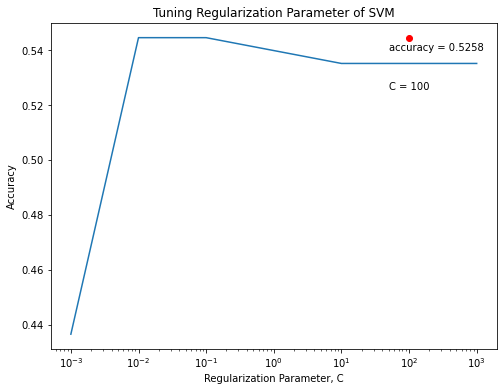

In [72]:
plt.figure(figsize=(8,6))
plt.plot(pwrs, acc_list)
plt.plot(100, max(acc_list), 'ro')
plt.text(50, 0.5258, r'C = 100')
plt.text(50, 0.5399, r'accuracy = 0.5258')
plt.xscale('log')
plt.xlabel('Regularization Parameter, C')
plt.ylabel('Accuracy')
plt.title('Tuning Regularization Parameter of SVM')
plt.show()

In [73]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = (tp + tn)/(tp + tn + fp + fn)

In [74]:
#Performance Improvement via Parameter Tuning

In [75]:
#Method 1: Using our own piece of code

In [76]:
grid_params={'C':pwrs,'kernel':['linear','poly','rbf','sigmoid'],'degree':[2,3,4],'max_iter':[5000],'random_state':[0]}

In [77]:
# [18, 51, 171, 151 251,301] this list resulted in classifiers with lower accuracy, the below klist is giving the better accuracy with 0.58
#Using odd values in the klist
Klist = [ 89, 95, 99, 101, 103, 105]
for k in Klist:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = (tp + tn)/(tp + tn + fp + fn)
    print(accuracy)

0.5915492957746479
0.568075117370892
0.5352112676056338
0.5539906103286385
0.5446009389671361
0.5352112676056338


In [78]:
#Method 2: Using Grid Search

In [79]:
grid_params = {
    'n_neighbors': Klist,
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [80]:
gs = GridSearchCV(
KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = 5,
    n_jobs = -1
)

In [81]:
gsf = gs.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.2s finished


In [82]:
gsf.best_score_

0.6028686868686868

In [83]:
gsf.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=89)

In [84]:
gsf.best_params_

{'metric': 'manhattan', 'n_neighbors': 89, 'weights': 'uniform'}

# Decision Tree Algorithm

Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

In [85]:
import math
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [86]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

Building a Decision Tree Classifier

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dt = DecisionTreeClassifier(criterion = "entropy", max_features="auto", class_weight="balanced", random_state = 100)

In [89]:

dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_features='auto', random_state=100)

# Evaluating the classifier

Let us start by predicting the response for the test dataset

In [90]:
y_pred = dt.predict(X_test)

In [91]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [92]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [93]:
print(confusion_matrix(y_test, y_pred))

[[77 55]
 [39 42]]


In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.58      0.62       132
           1       0.43      0.52      0.47        81

    accuracy                           0.56       213
   macro avg       0.55      0.55      0.55       213
weighted avg       0.58      0.56      0.56       213



In [95]:
roc_auc_score(y_test, y_pred)

0.5509259259259259

# Visualizing the Decision Tree

In [96]:
from sklearn.tree import plot_tree

[Text(133.46352208646618, 213.25846153846155, 'X[24] <= 6.371\nentropy = 1.0\nsamples = 496\nvalue = [248.0, 248.0]'),
 Text(131.22592810150377, 204.89538461538461, 'X[4] <= -1.7\nentropy = 1.0\nsamples = 493\nvalue = [245.138, 248.0]'),
 Text(20.138345864661655, 196.53230769230768, 'X[32] <= 2.105\nentropy = 0.839\nsamples = 24\nvalue = [17.169, 6.305]'),
 Text(17.90075187969925, 188.16923076923078, 'X[5] <= -1.909\nentropy = 0.785\nsamples = 23\nvalue = [17.169, 5.254]'),
 Text(15.663157894736845, 179.80615384615385, 'entropy = 0.0\nsamples = 8\nvalue = [7.631, 0.0]'),
 Text(20.138345864661655, 179.80615384615385, 'X[29] <= 0.985\nentropy = 0.939\nsamples = 15\nvalue = [9.538, 5.254]'),
 Text(17.90075187969925, 171.44307692307692, 'X[23] <= 1.807\nentropy = 0.888\nsamples = 14\nvalue = [9.538, 4.203]'),
 Text(15.663157894736845, 163.07999999999998, 'X[4] <= -2.221\nentropy = 0.962\nsamples = 11\nvalue = [6.677, 4.203]'),
 Text(13.425563909774437, 154.71692307692308, 'entropy = 0.0\ns

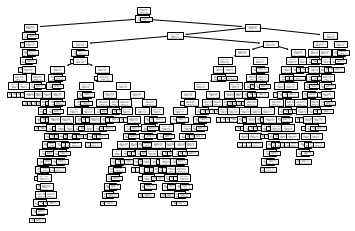

In [97]:
plot_tree(dt)

In [98]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [99]:
from sklearn.tree import export_graphviz
import graphviz

In [100]:
 y_pred = dt.predict(X_test)


In [101]:
print(confusion_matrix(y_test, y_pred))


[[77 55]
 [39 42]]


In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.58      0.62       132
           1       0.43      0.52      0.47        81

    accuracy                           0.56       213
   macro avg       0.55      0.55      0.55       213
weighted avg       0.58      0.56      0.56       213



In [103]:
 roc_auc_score(y_test, y_pred)


0.5509259259259259

# Scaling the data in order to improve the performance of the model

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)


X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [105]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [106]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[77 55]
 [39 42]]
              precision    recall  f1-score   support

           0       0.66      0.58      0.62       132
           1       0.43      0.52      0.47        81

    accuracy                           0.56       213
   macro avg       0.55      0.55      0.55       213
weighted avg       0.58      0.56      0.56       213



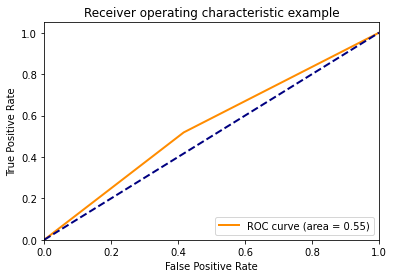

In [107]:
 from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %
         roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



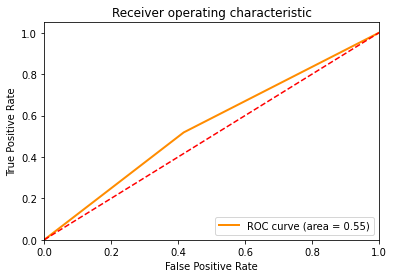

In [108]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
lw =2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [109]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = (tp + tn)/(tp + tn + fp + fn)
accuracy

0.5586854460093896

 Performance Improvement via Parameter Tuning

In [110]:
max_depth_range = list(range(2, 50))
acc = []


for depth in max_depth_range:
    dt = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    dt.fit(X_train, y_train)
    score = dt.score(X_test, y_test)
    acc.append(score)


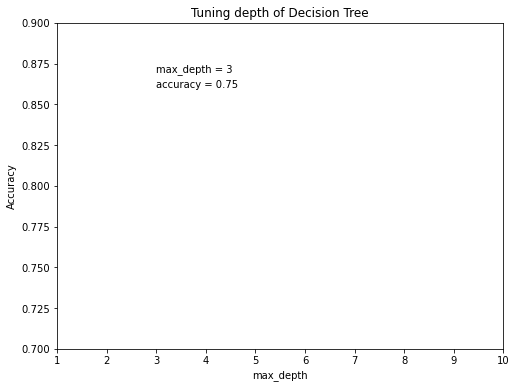

In [111]:
plt.figure(figsize=(8,6))
plt.plot(max_depth_range, acc)
plt.plot(3, max(acc), 'ro')
plt.text(3, 0.87, r'max_depth = 3')
plt.text(3, 0.86, r'accuracy = 0.75')
plt.xlim([1, 10])
plt.ylim([0.7, 0.9])
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Tuning depth of Decision Tree')
plt.show()

Method 2: Using Grid Search

In [112]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [113]:
grid_params = {
'max_depth': list(range(2, 50))
}

In [114]:
gs = GridSearchCV(
DecisionTreeClassifier(),
  grid_params,
  verbose = 1,
  cv = 5,
  n_jobs = -1
)


In [115]:
gsf = gs.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.4s finished


In [116]:
 gsf.best_score_

0.5905050505050504

In [117]:
gsf.best_estimator_


DecisionTreeClassifier(max_depth=12)

In [118]:
gsf.best_params_


{'max_depth': 12}

Building the Decision Tree with the best parameters found through Grid Search

In [119]:
dt = DecisionTreeClassifier(criterion = "entropy", max_features = "auto",
  class_weight = "balanced", max_depth = 3, random_state = 100)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_features='auto', random_state=100)

In [120]:
y_pred_postgs = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred_postgs))
print(classification_report(y_test, y_pred_postgs))
roc_auc_score(y_test, y_pred_postgs)


[[75 57]
 [44 37]]
              precision    recall  f1-score   support

           0       0.63      0.57      0.60       132
           1       0.39      0.46      0.42        81

    accuracy                           0.53       213
   macro avg       0.51      0.51      0.51       213
weighted avg       0.54      0.53      0.53       213



0.5124859708193041

# Building a Random Forest Classifier

In [121]:
 from sklearn.ensemble import RandomForestClassifier

In [122]:
 rf = RandomForestClassifier(n_estimators=30, n_jobs=-1, criterion = "entropy",
    max_features="auto", class_weight="balanced", oob_score= True,
   random_state=100)

In [123]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=30, n_jobs=-1, oob_score=True,
                       random_state=100)

In [124]:
y_pred_rf = rf.predict(X_test)

In [125]:
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
roc_auc_score(y_test, y_pred_rf)


[[109  23]
 [ 38  43]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       132
           1       0.65      0.53      0.59        81

    accuracy                           0.71       213
   macro avg       0.70      0.68      0.68       213
weighted avg       0.71      0.71      0.71       213



0.6783108866442199

In [126]:
 tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
accuracy = (tp +tn)/(tp + tn + fp + fn)
print(accuracy)


0.7136150234741784


In [127]:
rf.oob_score_


0.6411290322580645

Feature Importance

In [128]:
importances = pd.DataFrame({'feature':ipl_data.columns, 'importance':np.
  round(rf.feature_importances_,3)})
importances = importances.sort_values('importance', ascending=False)
importances

,feature,importance
6,Day,0.108
4,first_bat_score,0.106
5,second_bat_score,0.096
2,win_by_runs,0.092
0,season,0.071
...,...,...
38,team1_Delhi Capitals,0.001
20,city_East London,0.001
25,city_Kanpur,0.000
26,city_Kimberley,0.000


In [129]:
importances.columns

Index(['feature', 'importance'], dtype='object')

Visualizing feature importance

In [130]:
import seaborn as sns
%matplotlib inline

No handles with labels found to put in legend.


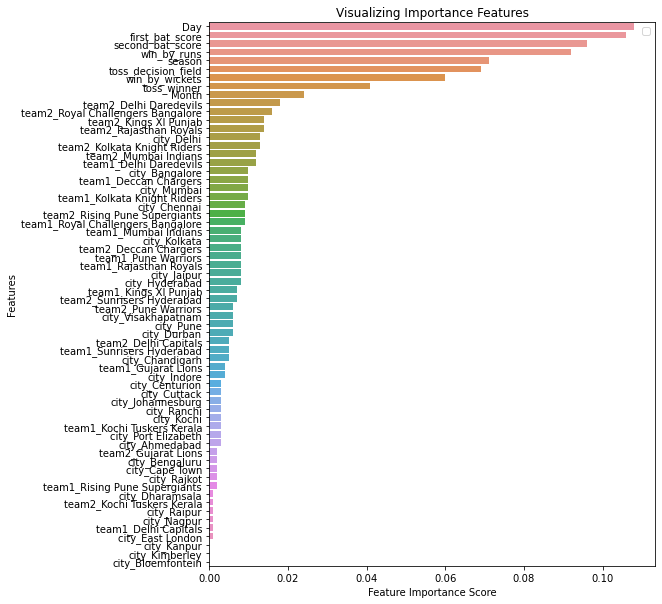

In [131]:
plt.figure(figsize = (8, 10))
sns.barplot(x=importances['importance'], y=importances['feature'])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Importance Features")
plt.legend()
plt.show()


Comparing ROC curves for Decision Trees and Random Forest

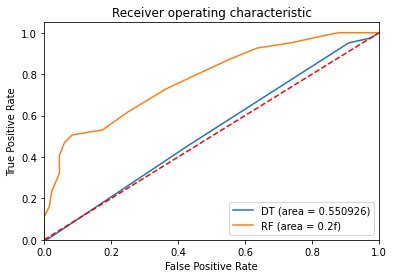

In [132]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DT (area = %02f)' % roc_auc_score(y_test, y_pred))


fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr_RF, tpr_RF, label='RF (area = 0.2f)' % roc_auc_score(y_test,
  y_pred_rf))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# K-Means Clustering Algorithm

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

In [133]:
## Scaling the data to improve performance

In [134]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [135]:
scaler = StandardScaler()
ipl_scaled = scaler.fit_transform(ipl.drop('winner', axis = 1))

In [136]:
ipl.head()

,season,toss_winner,winner,win_by_runs,win_by_wickets,first_bat_score,second_bat_score,Day,Month,city_Ahmedabad,...,team2_Kings XI Punjab,team2_Kochi Tuskers Kerala,team2_Kolkata Knight Riders,team2_Mumbai Indians,team2_Pune Warriors,team2_Rajasthan Royals,team2_Rising Pune Supergiants,team2_Royal Challengers Bangalore,team2_Sunrisers Hyderabad,toss_decision_field
0,2010,1,0,0.0,9.0,82.0,86.0,24,4,0,...,0,0,0,0,0,0,0,0,0,0
1,2010,0,0,40.0,0.0,177.0,137.0,29,3,0,...,0,0,1,0,0,0,0,0,0,0
2,2008,0,0,0.0,8.0,67.0,68.0,16,5,0,...,0,0,1,0,0,0,0,0,0,1
3,2016,0,1,13.0,0.0,185.0,172.0,22,4,0,...,0,0,0,0,0,0,0,1,0,1
4,2010,0,0,38.0,0.0,142.0,104.0,22,4,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
pd.DataFrame(ipl_scaled)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-0.991910,0.951795,-0.582786,1.649286,-2.650957,-2.028085,1.040092,-0.696932,-0.125536,-0.306816,...,-0.369077,-0.092384,-0.371540,-0.390955,-0.178951,-0.341373,-0.147016,-0.351587,-0.275450,-1.259997
1,-0.991910,-1.050646,1.103038,-0.997619,0.499721,-0.366060,1.655845,-2.366272,-0.125536,-0.306816,...,-0.369077,-0.092384,2.691503,-0.390955,-0.178951,-0.341373,-0.147016,-0.351587,-0.275450,-1.259997
2,-1.586636,-1.050646,-0.582786,1.355185,-3.148433,-2.614682,0.054888,0.972408,-0.125536,-0.306816,...,-0.369077,-0.092384,2.691503,-0.390955,-0.178951,-0.341373,-0.147016,-0.351587,-0.275450,0.793653
3,0.792269,-1.050646,-0.034893,-0.997619,0.765041,0.774545,0.793791,-0.696932,-0.125536,-0.306816,...,-0.369077,-0.092384,-0.371540,-0.390955,-0.178951,-0.341373,-0.147016,2.844247,-0.275450,0.793653
4,-0.991910,-1.050646,1.018747,-0.997619,-0.661055,-1.441488,0.793791,-0.696932,-0.125536,-0.306816,...,-0.369077,-0.092384,-0.371540,-0.390955,-0.178951,-0.341373,-0.147016,-0.351587,-0.275450,-1.259997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,0.792269,0.951795,0.344417,-0.997619,0.300731,0.025005,0.793791,0.972408,-0.125536,-0.306816,...,-0.369077,-0.092384,-0.371540,-0.390955,-0.178951,-0.341373,-0.147016,-0.351587,3.630427,0.793653
705,1.386996,-1.050646,-0.582786,-0.703518,-0.495230,0.090182,-0.437714,-0.696932,-0.125536,-0.306816,...,-0.369077,-0.092384,-0.371540,2.557842,-0.178951,-0.341373,-0.147016,-0.351587,-0.275450,0.793653
706,-1.289273,-1.050646,2.704571,-0.997619,0.532886,-1.571843,-1.422918,0.972408,-0.125536,-0.306816,...,-0.369077,-0.092384,-0.371540,-0.390955,-0.178951,-0.341373,-0.147016,-0.351587,-0.275450,-1.259997
707,-1.586636,0.951795,-0.582786,1.649286,-1.324356,-0.724536,1.532694,0.972408,-0.125536,3.259287,...,-0.369077,-0.092384,-0.371540,2.557842,-0.178951,-0.341373,-0.147016,-0.351587,-0.275450,0.793653


In [138]:
import numpy as np

In [139]:
#initializing number of clusters
k = int(np.sqrt(ipl_scaled.shape[0]/2))

In [140]:
k

18

In [141]:
kmeans = KMeans(init="random", n_clusters=k, tol = 1e-3, n_init=10,max_iter=300, random_state=100)

In [142]:
kmeans.fit(ipl_scaled)

KMeans(init='random', n_clusters=18, random_state=100, tol=0.001)

In [143]:
# The lowest SSE value
kmeans.inertia_

26935.621358813343

In [144]:
kmeans = KMeans(init="k-means++", n_clusters=8, tol = 1e-3, n_init=10,max_iter=300, random_state=100)

In [145]:
kmeans.fit(ipl_scaled)

KMeans(random_state=100, tol=0.001)

In [146]:
kmeans.inertia_

36005.93894616235

In [147]:
#0.1 Identifying the number of clusters
#0.1.1 Method 1: Elbow method using SSE values
#To perform the elbow method, run several k-means, increment k with each iteration, and record
#the SSE.

In [148]:
sse = []
for k in range(28, 30):
    kmeans = KMeans(init="random", n_clusters=k, tol = 1e-3, n_init=10,max_iter=300, random_state=100)
    kmeans.fit(ipl_scaled)
    sse.append(kmeans.inertia_)

In [149]:
print(pd.Series(sse))

0    21246.910731
1    19962.944749
dtype: float64


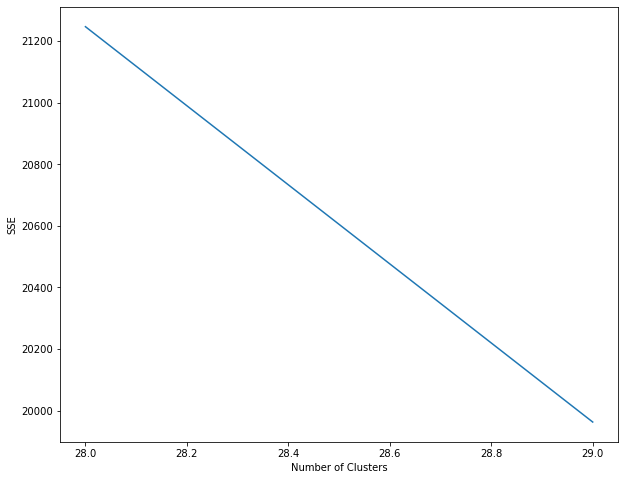

In [150]:
plt.figure(figsize = (10, 8))
plt.plot(list(range(28, 30)), sse)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [151]:
#Determining the elbow point in the SSE curve isn’t always straightforward. If you’re having trouble
#choosing the elbow point of the curve, then you could use a Python package, kneed, to identify the
#elbow point programmatically.

In [152]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [153]:
from kneed import KneeLocator

In [154]:
kl = KneeLocator(range(28, 30), sse, curve="convex", direction="decreasing")

E:\Anaconda\lib\site-packages\kneed\knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


In [155]:
kl.elbow

In [156]:
#0.1.2 Method 2: Using Silhouette coefficient
#The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a
#data point fits into its assigned cluster based on two factors:
#How close the data point is to other points in the cluster
#How far away the data point is from points in other clusters
#Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are
#closer to their clusters than they are to other clusters.

In [157]:
from sklearn.metrics import silhouette_score

In [158]:
kmeans_kwargs = {'init': 'k-means++', 'n_init': 10, 'tol': 1e-3, 'max_iter': 300, 'random_state': 100}

In [159]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(28, 30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(ipl_scaled)
    score = silhouette_score(ipl_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

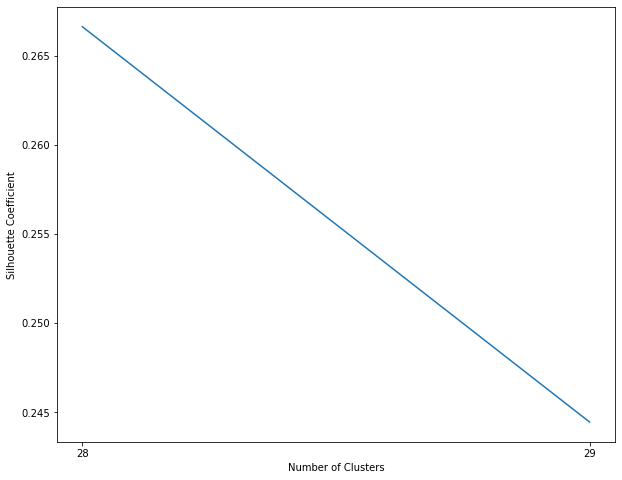

In [160]:
plt.figure(figsize=(10, 8))
plt.plot(range(28, 30), silhouette_coefficients)
plt.xticks(range(28, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [161]:
#Plotting the average silhouette scores for each k shows that the best choice for k is 2 since it has
#the maximum score. But this number is far off from the number suggested by the elbow method
#Ultimately, your decision on the number of clusters to use should be guided by a combination of
#domain knowledge and clustering evaluation metrics
#0.1.3 Further Pre-processing via PCA

In [162]:
from sklearn.decomposition import PCA

In [163]:
pca = PCA(whiten = True)

In [164]:
ipl_pca = pca.fit_transform(ipl_scaled)

In [165]:
pca.explained_variance_ratio_

array([0.03768977, 0.03631742, 0.0341939 , 0.0340403 , 0.03383418,
       0.03333266, 0.03325678, 0.03220361, 0.0297438 , 0.02899179,
       0.02776157, 0.02428126, 0.02353427, 0.0213893 , 0.02024643,
       0.0199948 , 0.01935139, 0.01914465, 0.01873931, 0.01857647,
       0.01841752, 0.01787346, 0.01768578, 0.01756626, 0.01712135,
       0.01677314, 0.01657587, 0.01651719, 0.01601159, 0.01596325,
       0.01577146, 0.0156276 , 0.01537175, 0.01516112, 0.01494447,
       0.01474162, 0.01455741, 0.0141684 , 0.01408984, 0.01364004,
       0.01345308, 0.01321951, 0.01271807, 0.01260187, 0.01198851,
       0.01156347, 0.01049501, 0.00903649, 0.00772937, 0.00610351,
       0.00586239, 0.00442827, 0.00270336, 0.00223263, 0.00217333,
       0.00162906, 0.00153544, 0.00130084, 0.00120087, 0.00094855,
       0.00073116, 0.00055902, 0.00045156, 0.0001318 ])

In [166]:
import itertools

In [167]:
print (list(itertools.accumulate(pca.explained_variance_ratio_,lambda x,y :x+y)))

[0.03768977337489877, 0.07400719772401888, 0.1082010955904775, 0.14224139770590852, 0.1760755805493059, 0.20940824361027163, 0.24266502225741746, 0.27486863021571434, 0.3046124349150972, 0.3336042223871122, 0.36136579437911176, 0.38564705466511706, 0.4091813197623857, 0.43057062466701607, 0.4508170539916515, 0.4708118534474396, 0.4901632419866563, 0.5093078942470997, 0.5280472076332557, 0.5466236794857687, 0.565041201612543, 0.5829146635991386, 0.6006004454614525, 0.6181667065687915, 0.6352880547814845, 0.652061196079267, 0.6686370611572143, 0.6851542560419, 0.7011658437421558, 0.717129098670997, 0.7329005597724266, 0.7485281583225748, 0.7638999090651191, 0.7790610298619186, 0.7940055009104313, 0.8087471208129671, 0.8233045349352573, 0.8374729326793215, 0.8515627765933311, 0.8652028187724421, 0.8786558984461088, 0.8918754086191305, 0.9045934793105297, 0.9171953491289488, 0.9291838615827228, 0.940747330383615, 0.9512423435135516, 0.9602788345695077, 0.9680082004090396, 0.974111715262908

In [168]:
ipl_scaled.shape

(709, 64)

In [169]:
pca = PCA(n_components = 60,whiten = True)

In [170]:
ipl_pca = pca.fit_transform(ipl_scaled)

In [171]:
sse = []
for k in range(28, 50):
    kmeans = KMeans(init="k-means++", n_clusters=k, tol = 1e-3, n_init=10,max_iter=300, random_state=100)
    kmeans.fit(ipl_pca)
    sse.append(kmeans.inertia_)

In [172]:
print(pd.Series(sse))

0     23925.726131
1     23298.876441
2     23302.144427
3     22453.173890
4     21792.585275
5     20651.476814
6     20579.097676
7     19620.246226
8     18952.936692
9     18319.873735
10    18256.391473
11    17747.327865
12    17298.027235
13    17313.375154
14    16365.206129
15    16284.579014
16    15941.561075
17    15561.822523
18    15614.260015
19    15350.536864
20    15005.813397
21    14655.043301
dtype: float64


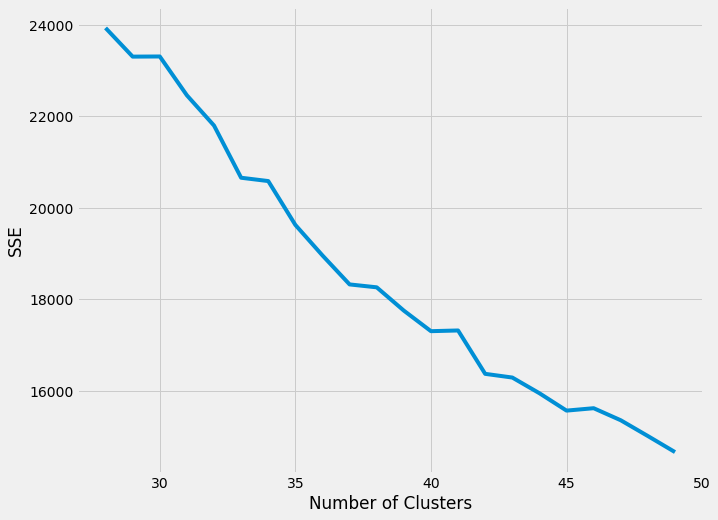

In [173]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (10, 8))
plt.plot(list(range(28, 50)), sse)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [174]:
kl = KneeLocator(range(28, 50), sse, curve="convex", direction="decreasing")

In [175]:
kl.elbow

29

In [176]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(28, 50):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(ipl_pca)
    score = silhouette_score(ipl_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

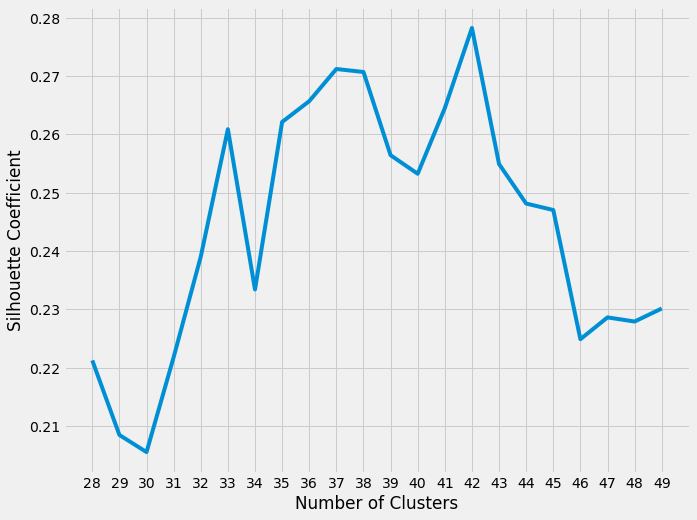

In [177]:
plt.figure(figsize=(10, 8))
plt.plot(range(28, 50), silhouette_coefficients)
plt.xticks(range(28, 50))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [178]:
kmeans = KMeans(n_clusters=2, **kmeans_kwargs)
kmeans.fit(ipl_pca)

KMeans(n_clusters=2, random_state=100, tol=0.001)

In [179]:
#0.1.4 External Evalution of the clustering algorithm via Rand Score
#Storing the predicted cluster numbers for the points in my dataset:

In [180]:
y_pred = kmeans.labels_

In [181]:
pd.Series(y_pred).value_counts()

1    695
0     14
dtype: int64

In [182]:
ipl['winner'].value_counts()

0    392
1    317
Name: winner, dtype: int64

In [183]:
#Converting the categories into numbers via replace function
y_true = ipl['winner']

In [184]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y_true, y_pred)

0.0020045912049504594

Silhoeutte is close to 1 and it is close to zero. Since the elbox  is not predicted we get the rand_score value as close to zero

# Hierarchical clustering on a scaled data set:

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

In [185]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [186]:
linked = linkage(ipl_scaled, 'ward')

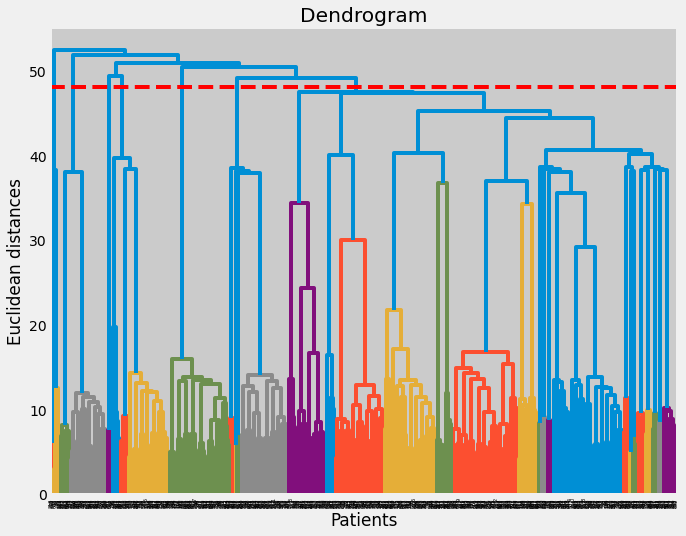

In [187]:
plt.figure(figsize = (10, 8))
dendrogram(linked)
plt.axhline(48, linestyle = '--', color = 'r')
plt.title('Dendrogram')
plt.xlabel('Patients')
plt.ylabel('Euclidean distances')
plt.show()

In [188]:
#Here we checking with 7 clusters

In [189]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage ='ward')

In [190]:
#Decide n_clusters based on your dendrogram

In [191]:
# fit and predict the cluster labels for you dataset:
hc.fit_predict(ipl_scaled)

array([0, 2, 0, 0, 0, 1, 0, 4, 0, 0, 0, 1, 0, 4, 0, 6, 1, 0, 0, 3, 3, 2,
       0, 0, 0, 3, 0, 4, 0, 1, 1, 0, 1, 3, 1, 1, 0, 0, 0, 0, 2, 0, 4, 2,
       2, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 6, 4, 4, 0, 0, 0,
       0, 5, 4, 0, 0, 2, 0, 0, 0, 6, 0, 4, 0, 0, 3, 0, 4, 0, 0, 0, 1, 4,
       0, 0, 6, 6, 0, 5, 0, 1, 4, 0, 1, 0, 2, 0, 1, 0, 0, 0, 4, 2, 4, 0,
       0, 0, 4, 0, 6, 0, 4, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       2, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 2, 6, 6, 1, 0, 1, 0, 2, 1,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 4, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 4, 0, 4, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 6,
       4, 0, 6, 0, 0, 6, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 4, 0, 1, 0, 2, 4, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 6, 0,
       0, 1, 0, 6, 0, 1, 0, 1, 0, 0, 0, 0, 0, 4, 4, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 3, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0,
       0, 6, 1, 4, 4, 1, 0, 0, 0, 0, 4, 0, 6, 0, 0,

In [192]:
y_pred = hc.labels_

In [193]:
#External Evaluation via Rand Score

In [194]:
y_true = ipl['winner']

In [195]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y_true, y_pred)

-0.0005471042432433286

# # Silhoutte Value
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [196]:
# Calculating the silhouette_score

In [197]:
from sklearn.metrics import silhouette_score

In [198]:
score = silhouette_score(ipl_scaled, kmeans.labels_)
score

0.11685599650120009

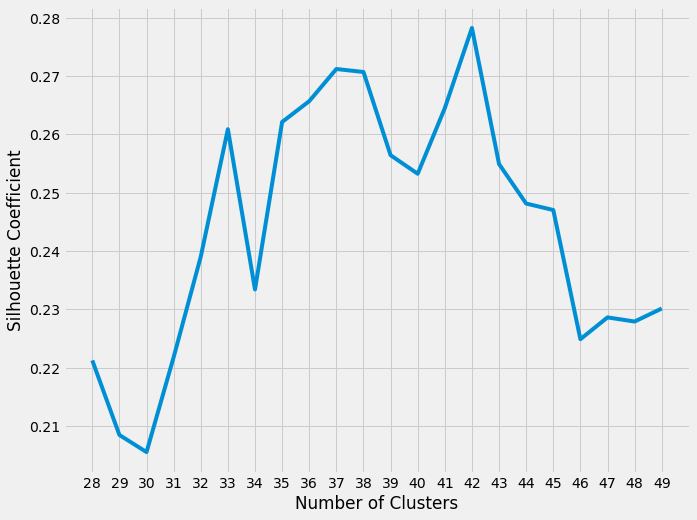

In [199]:
plt.figure(figsize=(10, 8))
plt.plot(range(28, 50), silhouette_coefficients)
plt.xticks(range(28, 50))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [200]:
#Hierarchical clustering on a scaled data set:

In [201]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [202]:
linked = linkage(ipl_scaled, 'ward')

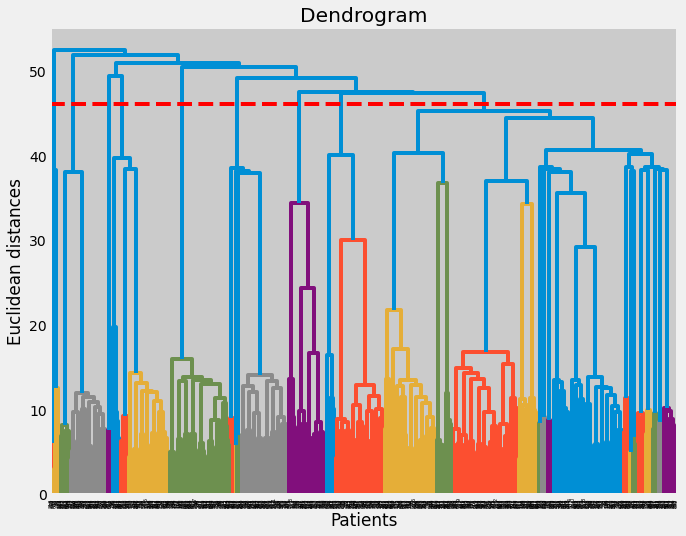

In [203]:
plt.figure(figsize = (10, 8))
dendrogram(linked)
plt.axhline(46, linestyle = '--', color = 'r')
plt.title('Dendrogram')
plt.xlabel('Patients')
plt.ylabel('Euclidean distances')
plt.show()


In [204]:
#Here we are checking with 9 clusters

In [205]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 9, affinity = 'euclidean', linkage ='ward')

In [206]:
#Decide n_clusters based on your dendrogram

In [207]:
# fit and predict the cluster labels for you dataset:
hc.fit_predict(ipl_scaled)

array([0, 2, 0, 7, 0, 3, 0, 4, 0, 0, 0, 3, 1, 4, 0, 6, 3, 1, 0, 8, 8, 2,
       0, 1, 0, 8, 0, 4, 0, 3, 3, 0, 3, 8, 3, 3, 1, 0, 1, 0, 2, 0, 4, 2,
       2, 7, 1, 0, 6, 7, 0, 0, 0, 0, 1, 4, 1, 2, 0, 1, 6, 4, 4, 0, 0, 0,
       0, 5, 4, 0, 0, 2, 1, 0, 0, 6, 7, 4, 0, 0, 8, 1, 4, 0, 0, 0, 3, 4,
       1, 0, 6, 6, 7, 5, 1, 3, 4, 0, 3, 0, 2, 0, 3, 0, 7, 1, 4, 2, 4, 1,
       0, 0, 4, 1, 6, 0, 4, 7, 8, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       2, 7, 0, 0, 7, 0, 4, 1, 3, 0, 0, 0, 1, 2, 6, 6, 3, 1, 3, 0, 2, 3,
       0, 0, 0, 0, 3, 2, 0, 0, 0, 3, 0, 4, 3, 3, 0, 3, 2, 0, 0, 0, 7, 7,
       4, 0, 7, 0, 4, 0, 4, 2, 0, 0, 0, 0, 0, 7, 2, 0, 1, 0, 0, 2, 3, 6,
       4, 1, 6, 0, 0, 6, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 8, 0,
       0, 7, 7, 0, 4, 0, 3, 0, 2, 4, 1, 7, 0, 0, 1, 0, 4, 0, 2, 1, 6, 0,
       1, 3, 0, 6, 0, 3, 0, 3, 0, 0, 0, 0, 1, 4, 4, 0, 2, 2, 0, 0, 0, 0,
       0, 7, 3, 0, 0, 0, 0, 4, 0, 0, 7, 8, 0, 0, 6, 7, 0, 0, 0, 1, 0, 0,
       0, 6, 3, 4, 4, 3, 0, 0, 1, 0, 4, 0, 6, 0, 0,

In [208]:
y_pred = hc.labels_

In [209]:
#External Evaluation via Rand Score

In [210]:
y_true = ipl['winner']

In [211]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y_true, y_pred)

0.008386453958297619

In [212]:
# Calculating the silhouette_score

In [213]:
from sklearn.metrics import silhouette_score

In [214]:
score = silhouette_score(ipl_scaled, kmeans.labels_)
score

0.11685599650120009